In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from user_agents import parse
from datetime import datetime
from datetime import timedelta
from dateutil import rrule
import matplotlib.ticker as ticker

# Basic data manipulation

In [4]:
data = {'Country': ['Belgium', 'India', 'Brazil', 'China'],
        'Capital': ['Brussels', 'New Delhi', 'Brasilia', 'Beijing'],
        'Population': [11190846, 1303171035, 207847528, 15007847528],
        'Num Lakes': [2, 2, 10, 20],
        'Animal': ['Tiger', 'Bird', np.nan, 'Dragon'],
        'Economics': ['Good', 'ok', 'ok', 'Good']}

In [5]:
# create data frame
df = pd.DataFrame(data, columns = ['Country', 'Capital', 'Population', 'Num Lakes', 'Animal', 'Economics'])

In [6]:
df

,Country,Capital,Population,Num Lakes,Animal,Economics
0,Belgium,Brussels,11190846,2,Tiger,Good
1,India,New Delhi,1303171035,2,Bird,ok
2,Brazil,Brasilia,207847528,10,NaN,ok
3,China,Beijing,15007847528,20,Dragon,Good


In [7]:
df['Color'] = ['red', 'yellow', 'green', 'red']
df

,Country,Capital,Population,Num Lakes,Animal,Economics,Color
0,Belgium,Brussels,11190846,2,Tiger,Good,red
1,India,New Delhi,1303171035,2,Bird,ok,yellow
2,Brazil,Brasilia,207847528,10,NaN,ok,green
3,China,Beijing,15007847528,20,Dragon,Good,red


In [8]:
# data types
df.dtypes

Country       object
Capital       object
Population     int64
Num Lakes      int64
Animal        object
Economics     object
Color         object
dtype: object

In [9]:
# turn a column to string value
df["Capital"] = df["Capital"].astype(str)
df.head()

,Country,Capital,Population,Num Lakes,Animal,Economics,Color
0,Belgium,Brussels,11190846,2,Tiger,Good,red
1,India,New Delhi,1303171035,2,Bird,ok,yellow
2,Brazil,Brasilia,207847528,10,NaN,ok,green
3,China,Beijing,15007847528,20,Dragon,Good,red


In [10]:
# Drop a column
df.drop('Country', axis = 1)

,Capital,Population,Num Lakes,Animal,Economics,Color
0,Brussels,11190846,2,Tiger,Good,red
1,New Delhi,1303171035,2,Bird,ok,yellow
2,Brasilia,207847528,10,NaN,ok,green
3,Beijing,15007847528,20,Dragon,Good,red


In [11]:
# Drop two columns
df.drop(columns = ['Country', 'Capital'])

,Population,Num Lakes,Animal,Economics,Color
0,11190846,2,Tiger,Good,red
1,1303171035,2,Bird,ok,yellow
2,207847528,10,NaN,ok,green
3,15007847528,20,Dragon,Good,red


In [12]:
# sort values ascending
df.sort_values('Country')

,Country,Capital,Population,Num Lakes,Animal,Economics,Color
0,Belgium,Brussels,11190846,2,Tiger,Good,red
2,Brazil,Brasilia,207847528,10,NaN,ok,green
3,China,Beijing,15007847528,20,Dragon,Good,red
1,India,New Delhi,1303171035,2,Bird,ok,yellow


In [13]:
# sort values descending
df.sort_values('Country', ascending = False)

,Country,Capital,Population,Num Lakes,Animal,Economics,Color
1,India,New Delhi,1303171035,2,Bird,ok,yellow
3,China,Beijing,15007847528,20,Dragon,Good,red
2,Brazil,Brasilia,207847528,10,NaN,ok,green
0,Belgium,Brussels,11190846,2,Tiger,Good,red


In [14]:
# sort by labels along an axis
df.sort_index()

,Country,Capital,Population,Num Lakes,Animal,Economics,Color
0,Belgium,Brussels,11190846,2,Tiger,Good,red
1,India,New Delhi,1303171035,2,Bird,ok,yellow
2,Brazil,Brasilia,207847528,10,NaN,ok,green
3,China,Beijing,15007847528,20,Dragon,Good,red


In [15]:
# get subset of a dataframe: get table with row 1 onwards
df[1:]

,Country,Capital,Population,Num Lakes,Animal,Economics,Color
1,India,New Delhi,1303171035,2,Bird,ok,yellow
2,Brazil,Brasilia,207847528,10,NaN,ok,green
3,China,Beijing,15007847528,20,Dragon,Good,red


In [16]:
df[1:3]

,Country,Capital,Population,Num Lakes,Animal,Economics,Color
1,India,New Delhi,1303171035,2,Bird,ok,yellow
2,Brazil,Brasilia,207847528,10,NaN,ok,green


In [17]:
# slice and index dataframe
df.loc[1:3, 'Country': 'Population']

,Country,Capital,Population
1,India,New Delhi,1303171035
2,Brazil,Brasilia,207847528
3,China,Beijing,15007847528


In [18]:
df.loc[1:3, 'Country':]

,Country,Capital,Population,Num Lakes,Animal,Economics,Color
1,India,New Delhi,1303171035,2,Bird,ok,yellow
2,Brazil,Brasilia,207847528,10,NaN,ok,green
3,China,Beijing,15007847528,20,Dragon,Good,red


In [19]:
df.loc[:,'Country': 'Population']

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasilia,207847528
3,China,Beijing,15007847528


In [20]:
# get the first country
df['Country'][0]

'Belgium'

In [21]:
df[['Country', 'Capital']] # select certain columns, double [] turn output into dataframe

,Country,Capital
0,Belgium,Brussels
1,India,New Delhi
2,Brazil,Brasilia
3,China,Beijing


In [22]:
df[df['Population']> 1200000000]

,Country,Capital,Population,Num Lakes,Animal,Economics,Color
1,India,New Delhi,1303171035,2,Bird,ok,yellow
3,China,Beijing,15007847528,20,Dragon,Good,red


In [23]:
df[(df['Population']> 1200000000) & (df['Num Lakes']> 2)] # filtering

,Country,Capital,Population,Num Lakes,Animal,Economics,Color
3,China,Beijing,15007847528,20,Dragon,Good,red


In [24]:
# basic information
df.shape

(4, 7)

In [25]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [26]:
df.columns

Index(['Country', 'Capital', 'Population', 'Num Lakes', 'Animal', 'Economics',
       'Color'],
      dtype='object')

In [27]:
# summary statistic
df.describe()

,Population,Num Lakes
count,4.000000e+00,4.000000
mean,4.132514e+09,8.500000
std,7.272468e+09,8.544004
min,1.119085e+07,2.000000
25%,1.586834e+08,2.000000
50%,7.555093e+08,6.000000
75%,4.729340e+09,12.500000
max,1.500785e+10,20.000000


In [28]:
# count non-NA / null values 
df['Country'].count()

4

In [29]:
df['Population'].sum()

16530056937

In [30]:
df['Population'].min() # max()

11190846

In [31]:
df.mean()

Population    4.132514e+09
Num Lakes     8.500000e+00
dtype: float64

In [32]:
df.median()

Population    755509281.5
Num Lakes             6.0
dtype: float64

In [33]:
df['Population'].quantile([0.25, 0.75, 0.99])

0.25    1.586834e+08
0.75    4.729340e+09
0.99    1.459671e+10
Name: Population, dtype: float64

In [34]:
df['Population'].mode()[0]

11190846

In [35]:
df['Population'].var()

5.288879080499104e+19

In [36]:
df['Population'].std()

7272467999.585219

In [37]:
len(df)

4

In [38]:
len(df['Country'])

4

In [39]:
# count number of rows with each unique value of variable
df['Num Lakes'].value_counts()

2     2
10    1
20    1
Name: Num Lakes, dtype: int64

In [40]:
# number of distinct values in a column
df['Num Lakes'].nunique()

3

In [41]:
# handling missing data: drop rows with any NA or null data
df.dropna()

,Country,Capital,Population,Num Lakes,Animal,Economics,Color
0,Belgium,Brussels,11190846,2,Tiger,Good,red
1,India,New Delhi,1303171035,2,Bird,ok,yellow
3,China,Beijing,15007847528,20,Dragon,Good,red


In [47]:
# fill NA in age column with mean value of age
data = sns.load_dataset('titanic')
data['age'].fillna(data['age'].mean(), inplace = True)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:
data.groupby('sex')['age'].apply(lambda x:x.fillna(x.median()))
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [49]:
df_a = pd.DataFrame({'A': [1,2,3], 'B': [4,5,6], 'C': [7,8,9]})
df_b = pd.DataFrame({'A': [11,21,31], 'B': [41,51,61], 'C': [71,81,91]})

In [50]:
# union: append rows
pd.concat([df_a, df_b])

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9
0,11,41,71
1,21,51,81
2,31,61,91


In [51]:
# Append columns 
pd.concat([df_a, df_b], axis = 1)

,A,B,C,A,B,C
0,1,4,7,11,41,71
1,2,5,8,21,51,81
2,3,6,9,31,61,91


In [54]:
# exclude rows where name is in exclude list
df[~df['name'].isin(exclude_names['name_x'])].name

In [55]:
# time diff between two dates
user_visits['time_diff'] = (user_visits['next_visit_date'] - user_visits['visit_date']).dt.days

### Window function

In [57]:
# Lead: next date ; LAG: prev date
user_visits.sort_values(by = ['user_id', 'visit_date'], inplace = True) # need to order value first
user_visits['next_visit_date'] = user_visits.groupby('user_id').shift(-1) # lead - next 
user_visits['prev_visit_date'] = user_visits.groupby('user_id').shift(1) # lag - prev

In [ ]:
# rank: dense rank (not skip after tie)
df['rank'] = df['salary'].rank(method = 'dense', ascending = False)
# rank: regular rank (skip after tie)
df['rank'] = df['salary'].rank(ascending = False)
# row_number
df['row_number'] = df['salary'].rank(method='first', ascending=False)

In [58]:
# aggregation window functions
data = {'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
        'salary': [50000, 60000, 45000, 70000, 55000],
        'department': ['HR', 'IT', 'HR', 'IT', 'HR']}

df = pd.DataFrame(data)

# Compute the max salary in each department (window-like function)
df['max_by_dept'] = df.groupby('department')['salary'].transform('max')
df['avg_by_dept'] = df.groupby('department')['salary'].transform('mean')
df['median_by_dept'] = df.groupby('department')['salary'].transform('median')
df['sum_by_dept'] = df.groupby('department')['salary'].transform('sum')
df['count_by_dept'] = df.groupby('department')['name'].transform('nunique')

df

,name,salary,department,max_by_dept,avg_by_dept,median_by_dept,sum_by_dept,count_by_dept
0,Alice,50000,HR,55000,50000,50000,150000,3
1,Bob,60000,IT,70000,65000,65000,130000,2
2,Charlie,45000,HR,55000,50000,50000,150000,3
3,David,70000,IT,70000,65000,65000,130000,2
4,Eva,55000,HR,55000,50000,50000,150000,3


In [59]:
# rolling windows
data = {
    'timestamp': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
                                 '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10']),
    'value': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

df = pd.DataFrame(data)

# Set the 'timestamp' column as the index (optional, but useful for time-based operations)
df.set_index('timestamp', inplace=True)

# Compute trailing 7-day average (7-day rolling mean)
df['7_day_avg'] = df['value'].rolling(window=7, min_periods=1).mean()

df.head()

,value,7_day_avg
timestamp,,
2023-01-01,10,10.0
2023-01-02,20,15.0
2023-01-03,30,20.0
2023-01-04,40,25.0
2023-01-05,50,30.0


### Group by

In [60]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emily', 'Frank', 'Gina', 'Harry'], 'Age': [32, 54, 28, 41, 25, 48, 36, 29], 'height': [175, 154, 168, 181, 175, 158, 160, 169], 'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'New York', 'Los Angeles', 'Los Angeles', 'New York'], 'Color':['Red', 'Red', 'Red', 'Red', 'Green', 'Green', 'Green', 'Green']}
df = pd.DataFrame(data)
pd.DataFrame(df.groupby(['City']).median()['Age']).reset_index()
pd.DataFrame(df.groupby(['City']).mean()['Age']).reset_index()

,City,Age
0,Chicago,28.000000
1,Houston,41.000000
2,Los Angeles,46.000000
3,New York,28.666667


In [61]:
pd.DataFrame(df.groupby(['City']).nunique()['Name']).reset_index()
pd.DataFrame(df.groupby(['City']).size()).reset_index()
pd.DataFrame(df.groupby(['City']).count()['Name']).reset_index()

,City,Name
0,Chicago,1
1,Houston,1
2,Los Angeles,3
3,New York,3


In [62]:
pd.DataFrame(df.groupby(['City']).median()[['Age', 'height']]).reset_index()

,City,Age,height
0,Chicago,28,168
1,Houston,41,181
2,Los Angeles,48,158
3,New York,29,175


In [63]:
pd.DataFrame(df.groupby(['City', 'Color']).count()['Name']).reset_index()

,City,Color,Name
0,Chicago,Red,1
1,Houston,Red,1
2,Los Angeles,Green,2
3,Los Angeles,Red,1
4,New York,Green,2
5,New York,Red,1


In [64]:
aggregated_df = df.groupby('City').agg(
    average_age = ('Age', 'mean'),
    standard_deviation = ('Age', 'std'),
    total_age = ('Age', 'sum'),
    count_age = ('Age', 'nunique')
).reset_index()

aggregated_df

,City,average_age,standard_deviation,total_age,count_age
0,Chicago,28.000000,NaN,28,1
1,Houston,41.000000,NaN,41,1
2,Los Angeles,46.000000,9.165151,138,3
3,New York,28.666667,3.511885,86,3


In [65]:
aggregated_df = df.groupby('City').agg(
    average_age = ('Age', lambda x: x.mean()),
    standard_deviation = ('Age', lambda x: x.std()),
    total_age = ('Age', lambda x: x.sum()),
    count_age = ('Age', lambda x: x.count()),
    custom_func = ('Age', lambda x: x.max() - x.min()) # can create custom functions
).reset_index()

aggregated_df

,City,average_age,standard_deviation,total_age,count_age,custom_func
0,Chicago,28.000000,NaN,28,1,0
1,Houston,41.000000,NaN,41,1,0
2,Los Angeles,46.000000,9.165151,138,3,18
3,New York,28.666667,3.511885,86,3,7


### Merge or join

In [66]:
data1 = {
    'employee_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'department': ['HR', 'IT', 'Finance', 'IT', 'HR']
}
employees = pd.DataFrame(data1)

In [67]:
data2 = {
    'id': [1, 2, 3, 5],  # Note that employee_id 4 is missing here
    'salary': [50000, 60000, 45000, 55000]
}
salaries = pd.DataFrame(data2)

In [68]:
inner_joined_df = pd.merge(employees, salaries, left_on='employee_id', right_on = 'id', how = 'inner')
inner_joined_df

,employee_id,name,department,id,salary
0,1,Alice,HR,1,50000
1,2,Bob,IT,2,60000
2,3,Charlie,Finance,3,45000
3,5,Eva,HR,5,55000


In [69]:
inner_joined_df_2 = employees.merge(salaries, left_on = 'employee_id', right_on = 'id', how = 'inner')
inner_joined_df_2

,employee_id,name,department,id,salary
0,1,Alice,HR,1,50000
1,2,Bob,IT,2,60000
2,3,Charlie,Finance,3,45000
3,5,Eva,HR,5,55000


In [70]:
left_joined_df = pd.merge(employees, salaries, left_on='employee_id', right_on = 'id', how='left')
left_joined_df

,employee_id,name,department,id,salary
0,1,Alice,HR,1.0,50000.0
1,2,Bob,IT,2.0,60000.0
2,3,Charlie,Finance,3.0,45000.0
3,4,David,IT,NaN,NaN
4,5,Eva,HR,5.0,55000.0


In [71]:
right_joined_df = pd.merge(employees, salaries, left_on='employee_id', right_on = 'id', how='right')
right_joined_df

,employee_id,name,department,id,salary
0,1,Alice,HR,1,50000
1,2,Bob,IT,2,60000
2,3,Charlie,Finance,3,45000
3,5,Eva,HR,5,55000


In [72]:
outer_joined_df = pd.merge(employees, salaries, left_on='employee_id', right_on = 'id', how='outer')
outer_joined_df

,employee_id,name,department,id,salary
0,1,Alice,HR,1.0,50000.0
1,2,Bob,IT,2.0,60000.0
2,3,Charlie,Finance,3.0,45000.0
3,4,David,IT,NaN,NaN
4,5,Eva,HR,5.0,55000.0


### Lambda functions

In [73]:
df = pd.DataFrame({'A': [1,2,3], 'B': [4,5,6], 'C': [7,8,9]})
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [74]:
# add 10 to each value in column A
df['A'] = df['A'].apply(lambda x: x + 10)
df

,A,B,C
0,11,4,7
1,12,5,8
2,13,6,9


In [75]:
# filter A column to obtain only values > 11
df[df['A'].apply(lambda x:x > 11)]
# same as df[df['A'] > 11] 

,A,B,C
1,12,5,8
2,13,6,9


In [76]:
# multiply A and B column values by 2
df[['A', 'B']] = df[['A', 'B']].apply(lambda x: x * 2)
df

,A,B,C
0,22,8,7
1,24,10,8
2,26,12,9


In [77]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emily', 'Frank', 'Gina', 'Harry'], 'Age': [15, 54, 28, 41, 25, 48, 36, 29], 'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'New York', 'Los Angeles', 'Los Angeles', 'New York']}
df = pd.DataFrame(data)
pd.DataFrame(df.groupby(['City']).mean()['Age']).reset_index()
pd.DataFrame(df.groupby(['City']).std()['Age']).reset_index()

,City,Age
0,Chicago,NaN
1,Houston,NaN
2,Los Angeles,9.165151
3,New York,7.211103


In [78]:
# lambda function to create categories
df['Age category'] = df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult' if x < 65 else 'Senior')
# df['Age category'] = df['Age'].map(lambda x: 'Child' if x < 18 else 'Adult' if x < 65 else 'Senior')
df

,Name,Age,City,Age category
0,Alice,15,New York,Child
1,Bob,54,Los Angeles,Adult
2,Charlie,28,Chicago,Adult
3,David,41,Houston,Adult
4,Emily,25,New York,Adult
5,Frank,48,Los Angeles,Adult
6,Gina,36,Los Angeles,Adult
7,Harry,29,New York,Adult


In [79]:
df['Age category 2'] = ['Child' if x < 18 else 'Adult' if x < 65 else 'Senior' for x in df['Age']]
df

,Name,Age,City,Age category,Age category 2
0,Alice,15,New York,Child,Child
1,Bob,54,Los Angeles,Adult,Adult
2,Charlie,28,Chicago,Adult,Adult
3,David,41,Houston,Adult,Adult
4,Emily,25,New York,Adult,Adult
5,Frank,48,Los Angeles,Adult,Adult
6,Gina,36,Los Angeles,Adult,Adult
7,Harry,29,New York,Adult,Adult


In [80]:
def age_group(x):
    if x < 18:
        return 'Child'
    elif x < 65:
        return 'Adult'
    else:
        return 'Senior'

In [81]:
df['Age category 3'] = df['Age'].apply(lambda x: age_group(x))
df

,Name,Age,City,Age category,Age category 2,Age category 3
0,Alice,15,New York,Child,Child,Child
1,Bob,54,Los Angeles,Adult,Adult,Adult
2,Charlie,28,Chicago,Adult,Adult,Adult
3,David,41,Houston,Adult,Adult,Adult
4,Emily,25,New York,Adult,Adult,Adult
5,Frank,48,Los Angeles,Adult,Adult,Adult
6,Gina,36,Los Angeles,Adult,Adult,Adult
7,Harry,29,New York,Adult,Adult,Adult


In [82]:
aggregated_df = df.groupby('City').agg(
    average_age = ('Age', 'mean'),
    standard_deviation = ('Age', 'std'),
    total_age = ('Age', 'sum'),
    count_age = ('Age', 'nunique')
).reset_index()

aggregated_df

,City,average_age,standard_deviation,total_age,count_age
0,Chicago,28,NaN,28,1
1,Houston,41,NaN,41,1
2,Los Angeles,46,9.165151,138,3
3,New York,23,7.211103,69,3


In [83]:
aggregated_df = df.groupby('City').agg(
    average_age = ('Age', lambda x: x.mean()),
    standard_deviation = ('Age', lambda x: x.std()),
    total_age = ('Age', lambda x: x.sum()),
    count_age = ('Age', lambda x: x.count()),
    custom_func = ('Age', lambda x: x.max() - x.min()) # can create custom functions
).reset_index()

aggregated_df

,City,average_age,standard_deviation,total_age,count_age,custom_func
0,Chicago,28,NaN,28,1,0
1,Houston,41,NaN,41,1,0
2,Los Angeles,46,9.165151,138,3,18
3,New York,23,7.211103,69,3,14


In [84]:
df = pd.DataFrame({'group': ['A', 'A', 'B', 'B', 'C'], 'id': ['a', 'b', 'c', 'd', 'e'], 'state': ['approve', 'approve', 'reject', 'reject', 'approve'], 'value': [1, 2, 3, 4, 5]})
df.groupby('group').agg(
    count_approve = ('id', lambda x: x[df.loc[x.index, 'state'] == 'approve'].nunique()),
    sum_approve = ('value', lambda x: x[df.loc[x.index, 'state'] == 'approve'].sum()),
    count_reject = ('id', lambda x: x[df.loc[x.index, 'state'] == 'reject'].nunique()),
    sum_reject = ('value', lambda x: x[df.loc[x.index, 'state'] == 'reject'].sum())
).reset_index()

,group,count_approve,sum_approve,count_reject,sum_reject
0,A,2,3,0,0
1,B,0,0,2,7
2,C,1,5,0,0


In [85]:
# Alternative approach:
df = pd.DataFrame({'group': ['A', 'A', 'B', 'B', 'C'], 'id': ['a', 'b', 'c', 'd', 'e'], 'state': ['approve', 'approve', 'reject', 'reject', 'approve'], 'value': [1, 2, 3, 4, 5]})
approved_df = df[df['state'] == 'approve']
count_approve = pd.DataFrame(approved_df.groupby('group').nunique()['id'].reset_index())
sum_approve = pd.DataFrame(approved_df.groupby('group').sum()['value'].reset_index())

reject_df = df[df['state'] == 'reject']
count_reject = pd.DataFrame(reject_df.groupby('group').nunique()['id'].reset_index())
sum_reject = pd.DataFrame(reject_df.groupby('group').sum()['value'].reset_index())

approve_result = pd.merge(count_approve, sum_approve, on = 'group').rename(columns = {'id': 'count_approve', 'value': 'sum_approve'})
reject_result = pd.merge(count_reject, sum_reject, on = 'group').rename(columns = {'id': 'count_reject', 'value': 'sum_reject'})

final_result = pd.merge(approve_result, reject_result, on = 'group', how = 'outer') #.rename(columns = {'id': 'count_approve', 'value': 'sum_approve'})
final_result.fillna(0, inplace = True)
final_result.sort_values('group')

,group,count_approve,sum_approve,count_reject,sum_reject
0,A,2.0,3.0,0.0,0.0
2,B,0.0,0.0,2.0,7.0
1,C,1.0,5.0,0.0,0.0


In [86]:
number_list = [1,2,3]
y = map(lambda x:x**2, number_list)
print(list(y))

[1, 4, 9]


### Python basics

In [87]:
# Loops: for and while loops

In [88]:
i = 0
while i <= 3:
    print(i)
    i += 1

0
1
2
3


In [89]:
for i in range(5):
    print(i)

0
1
2
3
4


In [90]:
for i in range(1, 6, 2):
    print(i)

1
3
5


In [91]:
for i in range(4, -1, -1):
    print(i)

4
3
2
1
0


In [92]:
# Conditionals

In [93]:
i = 10
if i % 3 == 0 and i % 5 == 0:
    print("FizzBuzz")
elif i % 3 == 0:
    print("Fizz")
elif i % 5 == 0:
    print("Buzz")
else:
    print(i)

Buzz


In [94]:
# 2 ^ 10
2 ** 10

1024

In [95]:
# Function

In [96]:
def greet(name):
    return "Hello, " + name

print(greet("Josh"))

Hello, Josh


In [97]:
# others
def min_index(numbers):
    # Assume len(numbers) >= 1
    m = numbers[0]
    idx = 0
    for i in range(len(numbers)):
        if numbers[i] < m:
            m = numbers[i]
            idx = i
    return idx

In [98]:
numbers = [22,35,5,7,3,9]
min_index(numbers)

4

In [99]:
# Strings

In [100]:
s = 'hello'
s += ' world '
s += str(5)
s_length = len(s)
s

'hello world 5'

In [101]:
substr = s[1:5]
substr

'ello'

In [102]:
substr_2 = s[2]
substr_2

'l'

In [103]:
for letter in substr: # looping over every item in the string
    print(letter)

e
l
l
o


In [104]:
# Arrays (fixed size)

In [105]:
array = [4, 7, 10]
array[0] = 5
array
len(array)

3

In [106]:
array = [1, 2, 3]
for i in array:
    print(i)

1
2
3


In [107]:
# Enumerate index and value of list
# index : value = 0:1, 1:2, 2:3, 3:4, 4:5
for index, value in enumerate(array):
    print(index," : ",value)

0  :  1
1  :  2
2  :  3


In [108]:
# Lists (resizable)

In [109]:
list = []
list.append('zero')
list.append('one')
list[0] = 'zed'

if "one" in list:
    print("one in list")
    
for elem in list: # looping over every element in the list
    print(elem)

one in list
zed
one


In [110]:
# Sets

In [111]:
s = set()
s.add(1)
s.add(1)
s.add(2)
s

{1, 2}

In [112]:
s.remove(2)
s

{1}

In [113]:
if 1 in s:
    print("1 in s")

for elem in s:
    print(elem)

1 in s
1


In [114]:
# Dictionaries

In [115]:
d = {}
d['spain'] = 'madrid'
d['usa'] = 'vegas'
print(d.keys())
print(d.values())

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])


In [116]:
d['spain'] = "barcelona" # update existing entry
d['france'] = "paris" # add new entry
d

{'spain': 'barcelona', 'usa': 'vegas', 'france': 'paris'}

In [117]:
len(d)

3

In [118]:
if 'spain' in d:
    print(d.values())

dict_values(['barcelona', 'vegas', 'paris'])


In [119]:
for key in d.keys():
    print(key)

spain
usa
france


In [120]:
for values in d.values():
    print(values)

barcelona
vegas
paris


In [121]:
for key, values in d.items():
    print(key, ':', values)

spain : barcelona
usa : vegas
france : paris


In [122]:
pins = {'pin1': ['a', 'b', 'c'], 'pin2': ['a', 'c']}
count_a = 0
count_ab = 0
for key, values in pins.items():
    if 'a' in values:
        count_a += 1
        if 'b' in values:
            count_ab += 1

if count_a > 0:
    percentage_ab = count_ab / count_a 
else:
    0

In [123]:
percentage_ab

0.5

### List comprehension

In [124]:
num1 = [1,2,3]
num2 = [i+1 for i in num1]
num2

[2, 3, 4]

In [125]:
num1 = [5,10,15]
num2 = [i**2 if i == 10 else i - 5 if i < 7 else i + 5 for i in num1]
num2

[0, 100, 20]

# Visualization
https://www.atlassian.com/data/charts/what-is-a-scatter-plot

### Line charts (Matplotlib & Seaborn)

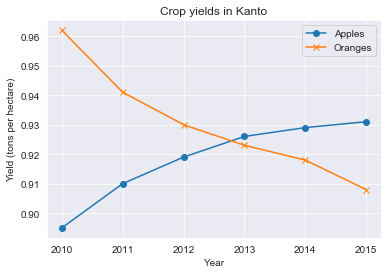

In [126]:
sns.set_style("darkgrid")

years = [2010, 2011, 2012, 2013, 2014, 2015]
yield_apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931]
yield_oranges = [0.962, 0.941, 0.93, 0.923, 0.918, 0.908]
plt.plot(years, yield_apples, marker = 'o')
plt.plot(years, yield_oranges, marker = 'x')
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')
plt.title('Crop yields in Kanto')
plt.legend(['Apples', 'Oranges'])
# plt.figure(figsize = (12, 6))

In [127]:
flowers_df = sns.load_dataset("iris").reset_index().rename(columns = {'index': 'id'})
flowers_df

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,virginica
146,146,6.3,2.5,5.0,1.9,virginica
147,147,6.5,3.0,5.2,2.0,virginica
148,148,6.2,3.4,5.4,2.3,virginica


Text(0.5, 1.0, 'sepal length for each id')

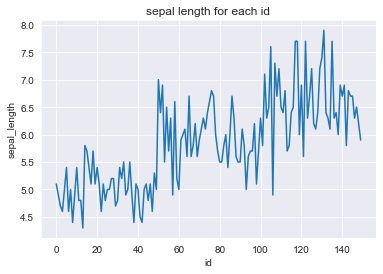

In [128]:
plt.plot(flowers_df.id, flowers_df.sepal_length)
plt.xlabel('id')
plt.ylabel('sepal_length')
plt.title('sepal length for each id')

Text(0.5, 1.0, 'sepal length for each id')

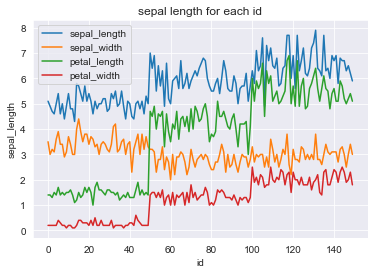

In [129]:
data_1 = flowers_df.loc[:, ["sepal_length", "sepal_width", "petal_length", "petal_width"]]
data_1.plot()
plt.xlabel('id')
plt.ylabel('sepal_length')
plt.title('sepal length for each id')

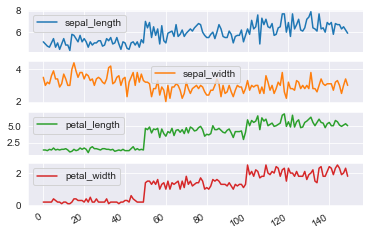

In [130]:
data_1.plot(subplots = True)
plt.show()

### Bar charts 

Text(0.5, 1.0, 'Crop Yields in Kanto')

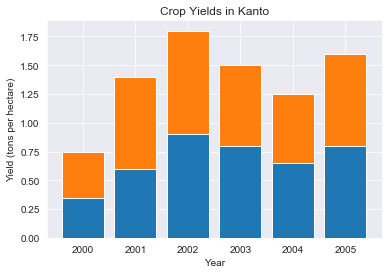

In [131]:
years = range(2000, 2006)
apples = [0.35, 0.6, 0.9, 0.8, 0.65, 0.8]
oranges = [0.4, 0.8, 0.9, 0.7, 0.6, 0.8]
plt.bar(years, apples)
plt.bar(years, oranges, bottom = apples)
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')
plt.title("Crop Yields in Kanto")

In [132]:
sepal_length_species = pd.DataFrame(flowers_df.groupby('species')['sepal_length'].mean().reset_index())

Text(0.5, 1.0, 'avg sepal length for species')

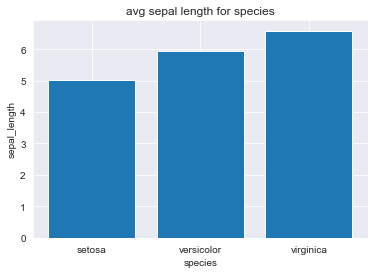

In [133]:
plt.bar(sepal_length_species.species, sepal_length_species.sepal_length)
plt.xlabel('species')
plt.ylabel('sepal_length')
plt.title('avg sepal length for species')

### Histograms

In [134]:
flowers_df = sns.load_dataset("iris")
flowers_df.sepal_width

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [135]:
flowers_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [136]:
flowers_df["species"].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

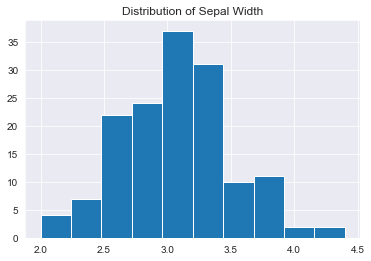

In [137]:
plt.title("Distribution of Sepal Width")
plt.hist(flowers_df.sepal_width)

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


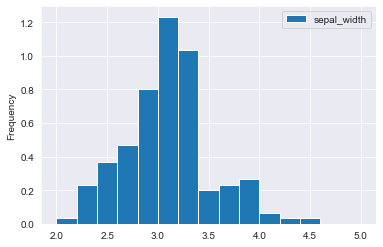

In [138]:
flowers_df.plot(kind = "hist", y = 'sepal_width', bins = 15, range = (2, 5), normed = True)

In [139]:
setosa_df = flowers_df[flowers_df.species == 'setosa']
versicolor_df = flowers_df[flowers_df.species == 'versicolor']
virginica_df = flowers_df[flowers_df.species == 'virginica']

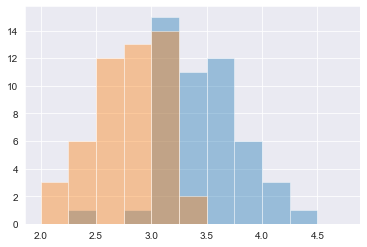

In [140]:
plt.hist(setosa_df.sepal_width, alpha = 0.4, bins = np.arange(2, 5, 0.25));
plt.hist(versicolor_df.sepal_width, alpha = 0.4, bins = np.arange(2, 5, 0.25));

### Scatter plots
observe relationships between variables

In [141]:
flowers_df = sns.load_dataset("iris")
flowers_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [142]:
flowers_df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

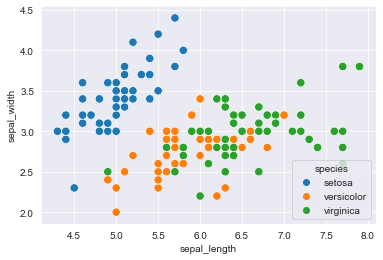

In [143]:
sns.scatterplot(x = flowers_df.sepal_length, 
                y = flowers_df.sepal_width, 
                hue = flowers_df.species, 
                s = 70);

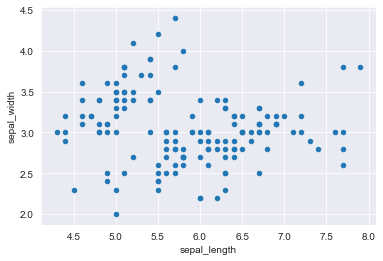

In [144]:
flowers_df.plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width')

### Box plots
uses boxes and lines to depict the distributions of one or more groups of numeric data. Box limits indicate the range of the central 50% of the data, with a central line marking the median value. Lines extend from each box to capture the range of the remaining data, with dots placed past the line edges to indicate outliers.

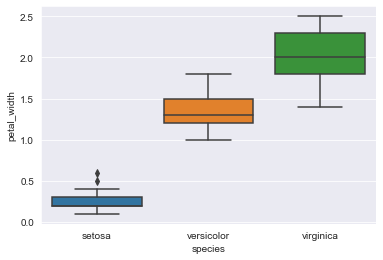

In [145]:
sns.boxplot(x = 'species', y = 'petal_width', data = flowers_df)

In [146]:
# data.boxplot(column = 'petal_width', by = 'species')

### Violin plots

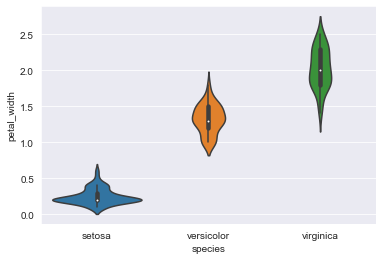

In [147]:
sns.violinplot(x = 'species', y = 'petal_width', data = flowers_df, size = 6)

### Pairplot

In [149]:
# sns.pairplot(flowers_df.drop("id", axis=1), hue="species", size=3)

### Visualize distribution

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df = pd.DataFrame({'latitude': [34.0522, 91.1234, -100.5432, 45.6789, -88.1234, -50.6789, 20.4534, 12.5555, -180.0]})
df

,latitude
0,34.0522
1,91.1234
2,-100.5432
3,45.6789
4,-88.1234
5,-50.6789
6,20.4534
7,12.5555
8,-180.0000


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


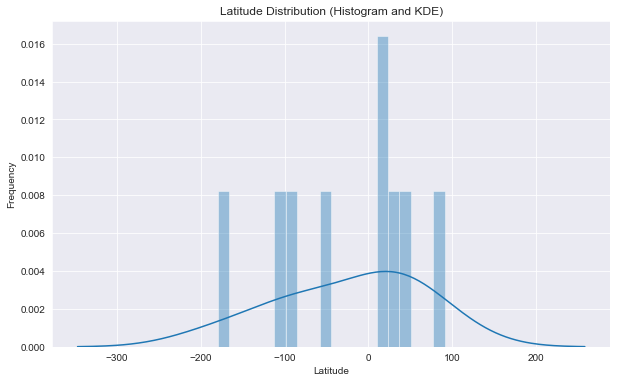

In [152]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.distplot(df['latitude'], bins=20, kde=True)
plt.title('Latitude Distribution (Histogram and KDE)')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

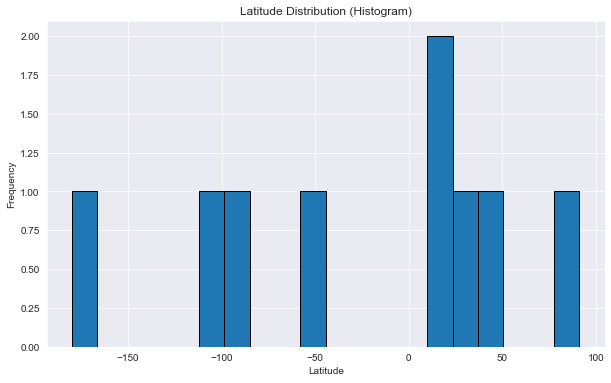

In [153]:
# Plot histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['latitude'], bins=20, edgecolor='black')
plt.title('Latitude Distribution (Histogram)')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

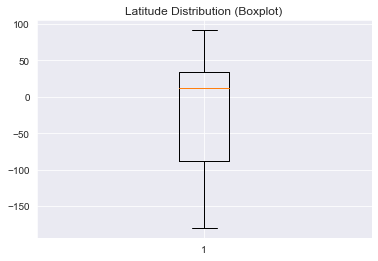

In [154]:
# Plot boxplot using matplotlib
plt.figure(figsize=(6, 4))
plt.boxplot(df['latitude'])
plt.title('Latitude Distribution (Boxplot)')
plt.show()

In [155]:
# Group into bins before plotting distribution
# Continuous data (such as age, salary, or temperature) can have a large number of unique values. 
# Grouping them into buckets or bins simplifies the data, making it easier to interpret visually.

In [156]:
ages = [23, 45, 67, 22, 34, 25, 40, 55, 60, 35, 20, 28, 33, 44, 29] * 67  # 1000 data points
df = pd.DataFrame({'age': ages})
bins = [0, 10, 20, 30, 40, 50, 60, 70]

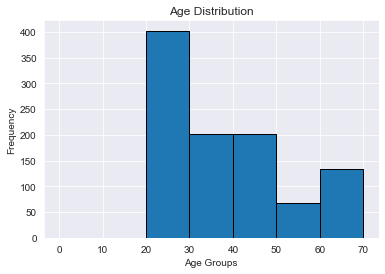

In [157]:
# Plot the histogram
plt.hist(df['age'], bins=bins, edgecolor='black')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

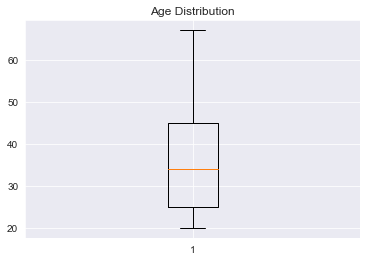

In [158]:
# Plot boxplot using matplotlib
plt.figure(figsize=(6, 4))
plt.boxplot(df['age'])
plt.title('Age Distribution')
plt.show()

# Some leetcode practise problems

### Example Leetcode 1205 - Monthly transactions II

In [159]:
data = [[121, 'US', 'approved', 1000, '2018-12-18'], [122, 'US', 'declined', 2000, '2018-12-19'], [123, 'US', 'approved', 2000, '2019-01-01'], [124, 'DE', 'approved', 2000, '2019-01-07']]
transactions = pd.DataFrame(data, columns=['id', 'country', 'state', 'amount', 'trans_date']).astype({'id':'Int64', 'country':'object', 'state':'object', 'amount':'Int64', 'trans_date':'datetime64[ns]'})

data = [[102, '2019-05-29'], [101, '2019-06-30'], [105, '2019-09-18'], [121, '2019-09-20'], [123, '2019-09-25']]
chargebacks = pd.DataFrame(data, columns=['trans_id', 'trans_date']).astype({'trans_id':'Int64', 'trans_date':'datetime64[ns]'})

In [160]:
transactions.head()

,id,country,state,amount,trans_date
0,121,US,approved,1000,2018-12-18
1,122,US,declined,2000,2018-12-19
2,123,US,approved,2000,2019-01-01
3,124,DE,approved,2000,2019-01-07


In [161]:
chargebacks.head()

,trans_id,trans_date
0,102,2019-05-29
1,101,2019-06-30
2,105,2019-09-18
3,121,2019-09-20
4,123,2019-09-25


In [162]:
# filter for approved transactions
approved_transactions = transactions[transactions['state'] == 'approved']
approved_transactions

,id,country,state,amount,trans_date
0,121,US,approved,1000,2018-12-18
2,123,US,approved,2000,2019-01-01
3,124,DE,approved,2000,2019-01-07


In [163]:
# get transaction information for chargeback
chargebacks = chargebacks.merge(transactions[['id', 'country', 'amount']], left_on='trans_id', right_on='id', how='inner')
chargebacks['state'] = 'chargeback'
chargebacks

,trans_id,trans_date,id,country,amount,state
0,121,2019-09-20,121,US,1000,chargeback
1,123,2019-09-25,123,US,2000,chargeback


In [164]:
# chargebacks = pd.merge(chargebacks, transactions, how = 'inner', left_on = 'trans_id', right_on = 'id')
# chargebacks

In [165]:
# Union the two tables
cte = pd.concat([approved_transactions[['id', 'country', 'state', 'amount', 'trans_date']], chargebacks[['trans_id', 'country', 'state', 'amount', 'trans_date']].rename(columns={'trans_id': 'id'})])
cte

,id,country,state,amount,trans_date
0,121,US,approved,1000,2018-12-18
2,123,US,approved,2000,2019-01-01
3,124,DE,approved,2000,2019-01-07
0,121,US,chargeback,1000,2019-09-20
1,123,US,chargeback,2000,2019-09-25


In [166]:
# turn trans_date into year - month format
cte['month'] = cte['trans_date'].dt.strftime('%Y-%m')
cte

,id,country,state,amount,trans_date,month
0,121,US,approved,1000,2018-12-18,2018-12
2,123,US,approved,2000,2019-01-01,2019-01
3,124,DE,approved,2000,2019-01-07,2019-01
0,121,US,chargeback,1000,2019-09-20,2019-09
1,123,US,chargeback,2000,2019-09-25,2019-09


In [167]:
# any previous indexing issues due to duplicates are eliminated 
cte.reset_index(drop=True, inplace=True)
cte

,id,country,state,amount,trans_date,month
0,121,US,approved,1000,2018-12-18,2018-12
1,123,US,approved,2000,2019-01-01,2019-01
2,124,DE,approved,2000,2019-01-07,2019-01
3,121,US,chargeback,1000,2019-09-20,2019-09
4,123,US,chargeback,2000,2019-09-25,2019-09


In [168]:
# turn into function
data = [[121, 'US', 'approved', 1000, '2018-12-18'], [122, 'US', 'declined', 2000, '2018-12-19'], [123, 'US', 'approved', 2000, '2019-01-01'], [124, 'DE', 'approved', 2000, '2019-01-07']]
transactions = pd.DataFrame(data, columns=['id', 'country', 'state', 'amount', 'trans_date']).astype({'id':'Int64', 'country':'object', 'state':'object', 'amount':'Int64', 'trans_date':'datetime64[ns]'})

data = [[102, '2019-05-29'], [101, '2019-06-30'], [105, '2019-09-18'], [121, '2019-09-20'], [123, '2019-09-25']]
chargebacks = pd.DataFrame(data, columns=['trans_id', 'trans_date']).astype({'trans_id':'Int64', 'trans_date':'datetime64[ns]'})

In [169]:
def monthly_transactions(transactions: pd.DataFrame, chargebacks: pd.DataFrame) -> pd.DataFrame:
    # Step 1: Create the CTE (combined DataFrame)
    approved_transactions = transactions[transactions['state'] == 'approved']

    # Get chargebacks and add a 'state' column
    chargebacks = chargebacks.merge(transactions[['id', 'country', 'amount']], left_on='trans_id', right_on='id', how='inner')
    chargebacks['state'] = 'chargeback'

    # Combine approved transactions and chargebacks into one DataFrame
    cte = pd.concat([approved_transactions[['id', 'country', 'state', 'amount', 'trans_date']], chargebacks[['trans_id', 'country', 'state', 'amount', 'trans_date']].rename(columns={'trans_id': 'id'})])

    # Step 2: Create 'month' column in the combined DataFrame
    cte['month'] = cte['trans_date'].dt.strftime('%Y-%m')

    # Step 3: Perform the aggregation (groupby)
    cte.reset_index(drop=True, inplace=True)
    result = cte.groupby(['month', 'country']).agg(
        # approved_count = ('state', lambda x: (x == 'approved').sum()),        
        approved_count = ('id', lambda x: x[cte.loc[x.index, 'state'] == 'approved'].nunique()), # COUNT(DISTINCT CASE WHEN state = 'approved' THEN id ELSE NULL END) AS approved_count,
        approved_amount = ('amount', lambda x: x[cte.loc[x.index, 'state'] == 'approved'].sum()), # SUM(CASE WHEN state = 'approved' THEN amount ELSE 0 END) AS approved_amount,        
        # chargeback_count = ('state', lambda x: (x == 'chargeback').sum()),
        chargeback_count = ('id', lambda x: x[cte.loc[x.index, 'state'] == 'chargeback'].nunique()), # COUNT(DISTINCT CASE WHEN state = 'chargeback' THEN id ELSE NULL END) AS chargeback_count,
        chargeback_amount = ('amount', lambda x: x[cte.loc[x.index, 'state'] == 'chargeback'].sum()) # SUM(CASE WHEN state = 'chargeback' THEN amount ELSE 0 END) AS chargeback_amount
    ).reset_index()
    
    return result

In [170]:
monthly_transactions(transactions, chargebacks)

,month,country,approved_count,approved_amount,chargeback_count,chargeback_amount
0,2018-12,US,1.0,1000.0,0.0,0.0
1,2019-01,DE,1.0,2000.0,0.0,0.0
2,2019-01,US,1.0,2000.0,0.0,0.0
3,2019-09,US,0.0,0.0,2.0,3000.0


### Leetcode 177 - Employee with id and salary

In [171]:
data = [[1, 100], [2, 200], [3, 300], [4, 500], [5, 500]]
employee = pd.DataFrame(data, columns=['id', 'salary']).astype({'id':'Int64', 'salary':'Int64'})

In [172]:
employee

,id,salary
0,1,100
1,2,200
2,3,300
3,4,500
4,5,500


In [173]:
def nth_highest_salary(employee: pd.DataFrame, N: int) -> pd.DataFrame:
    dist = employee.drop_duplicates(subset = 'salary')
    dist['rank'] = dist['salary'].rank(method = 'dense', ascending = False)
    ans = dist[dist['rank'] == N][['salary']]
    if not len(ans):
        return pd.DataFrame({f'getNthHighestSalary({N})': [None]})
    ans.rename(columns = {'salary': f'getNthHighestSalary({N})'}, inplace = True)
    return ans

In [174]:
nth_highest_salary(employee, 2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,getNthHighestSalary(2)
2,300


### Leetcode 2082 - number of rich count

In [175]:
data = [[6, 1, 549], [8, 1, 834], [4, 2, 394], [11, 3, 657], [13, 3, 257]]
store = pd.DataFrame(data, columns=['bill_id', 'customer_id', 'amount']).astype({'bill_id':'Int64', 'bill_id':'Int64', 'amount': 'Int64'})

In [176]:
store

,bill_id,customer_id,amount
0,6,1,549
1,8,1,834
2,4,2,394
3,11,3,657
4,13,3,257


In [177]:
store_500 = store[store['amount'] > 500]
store_customer_bill = store_500.groupby(['customer_id']).nunique()['bill_id'].reset_index()
store_customer_bill[store_customer_bill['bill_id'] > 0]['customer_id'].nunique()

2

In [178]:
df = store[store.amount > 500]
rich_count = df['customer_id'].nunique()
rich_count

2

### Leetcode 511 - Game play analysis I

In [179]:
df = pd.DataFrame({
    'player_id': [1,2,1,3,2],
    'event_date': ['2024-01-01', '2024-01-05', '2024-01-03', '2024-01-02', '2024-01-04']
})

In [180]:
df_sorted = df.sort_values(by = ['player_id', 'event_date'])
result = df_sorted.groupby('player_id').first().reset_index() # Group by player_id and get the first row per group
result

,player_id,event_date
0,1,2024-01-01
1,2,2024-01-04
2,3,2024-01-02


### Leetcode 607 - Sales Person

In [181]:
# SalesPerson Table
salesperson_data = {'sales_id': [1, 2, 3], 'name': ['John', 'Jane', 'Alice']}
salesperson_df = pd.DataFrame(salesperson_data)

# Company Table
company_data = {'com_id': [1, 2, 3, 4], 'name': ['RED', 'ORANGE', 'YELLOW', 'GREEN']}
company_df = pd.DataFrame(company_data)

# Sales Table
order_data = {
    'order_id': [1, 2, 3, 4],
    'com_id': [3, 4, 1, 1],
    'sales_id': [4, 5, 1, 4],
    'amount': [1000, 1500, 2000, 2500]
}
order_df = pd.DataFrame(order_data)

In [182]:
salesperson_order = pd.merge(salesperson_df, order_df, how = 'inner', left_on = 'sales_id', right_on = 'sales_id')
salesperson_order_company = pd.merge(salesperson_order, company_df, how = 'inner', left_on = 'com_id', right_on = 'com_id')
salesperson_order_company[salesperson_order_company['name_y'] == 'RED']
salesperson_df[~salesperson_df['name'].isin(salesperson_order_company['name_x'])].name

1     Jane
2    Alice
Name: name, dtype: object

### YoY growth for each category

In [183]:
data = {
    'Year': [2020, 2021, 2022, 2023, 2020, 2021, 2022, 2023],
    'Category': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
    'Sales': [100000, 120000, 150000, 180000, 50000, 60000, 70000, 80000]
}

In [184]:
# Create a DataFrame
df = pd.DataFrame(data)

In [185]:
# Sort the data by 'Category' and 'Year' (important for accurate YoY calculation)
df = df.sort_values(by=['Category', 'Year'])
df.head()

,Year,Category,Sales
0,2020,A,100000
1,2021,A,120000
2,2022,A,150000
3,2023,A,180000
4,2020,B,50000


In [186]:
df['Sales_lag'] = df.groupby('Category')['Sales'].shift(1) # lag
# df['Sales_lead'] = df.groupby('Category')['Sales'].shift(-1) # lead
df.head()

,Year,Category,Sales,Sales_lag
0,2020,A,100000,NaN
1,2021,A,120000,100000.0
2,2022,A,150000,120000.0
3,2023,A,180000,150000.0
4,2020,B,50000,NaN


In [187]:
df['YoY_growth'] = (df['Sales'] - df['Sales_lag']) / df['Sales_lag'] 
df['YoY_growth'].fillna(0, inplace = True)
df.head()

,Year,Category,Sales,Sales_lag,YoY_growth
0,2020,A,100000,NaN,0.00
1,2021,A,120000,100000.0,0.20
2,2022,A,150000,120000.0,0.25
3,2023,A,180000,150000.0,0.20
4,2020,B,50000,NaN,0.00


# Appendix

https://www.kaggle.com/discussions/general/418183

# Scratch paper

In [189]:
data = [['A', 'Math'], ['B', 'English'], ['C', 'Math'], ['D', 'Biology'], ['E', 'Math'], ['F', 'Computer'], ['G', 'Math'], ['H', 'Math'], ['I', 'Math']]
courses = pd.DataFrame(data, columns=['student', 'class']).astype({'student':'object', 'class':'object'})
stats = pd.DataFrame(courses.groupby('class').nunique()['student']).reset_index()
data = stats[stats['student']>= 5]
data[['class']]

,class
3,Math


In [190]:
data = [[1, 1], [2, 2], [3, 3], [4, 3]]
orders = pd.DataFrame(data, columns=['order_number', 'customer_number']).astype({'order_number':'Int64', 'customer_number':'Int64'})

In [191]:
stats = orders.groupby('customer_number').nunique()['order_number'].reset_index()
result = stats[stats['order_number'] == stats['order_number'].max()][['customer_number']]
result

,customer_number
2,3
